In [121]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [122]:
data=pd.read_csv("/content/Customer_Data.csv")

In [123]:
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,1,62,Male,56564,86
1,2,65,Male,25393,73
2,3,18,Male,143520,39
3,4,21,Male,64711,43
4,5,21,Male,147014,98


In [124]:
data.tail()

,Customer ID,Age,Gender,Annual Income,Spending Score
995,996,54,Female,138520,5
996,997,19,Male,108436,16
997,998,47,Male,131103,61
998,999,23,Male,59332,1
999,1000,34,Male,133068,40


In [125]:
data.shape

(1000, 5)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   int64 
 1   Age             1000 non-null   int64 
 2   Gender          1000 non-null   object
 3   Annual Income   1000 non-null   int64 
 4   Spending Score  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [127]:
data.describe()

,Customer ID,Age,Annual Income,Spending Score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,84856.809000,47.859000
std,288.819436,15.242311,38393.323903,28.606038
min,1.000000,18.000000,20359.000000,1.000000
25%,250.750000,30.000000,51173.750000,23.000000
50%,500.500000,43.000000,84462.000000,47.000000
75%,750.250000,56.000000,118356.250000,73.000000
max,1000.000000,69.000000,149870.000000,99.000000


In [128]:
data.isnull().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

<ipython-input-129-678bc5eb9c4c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


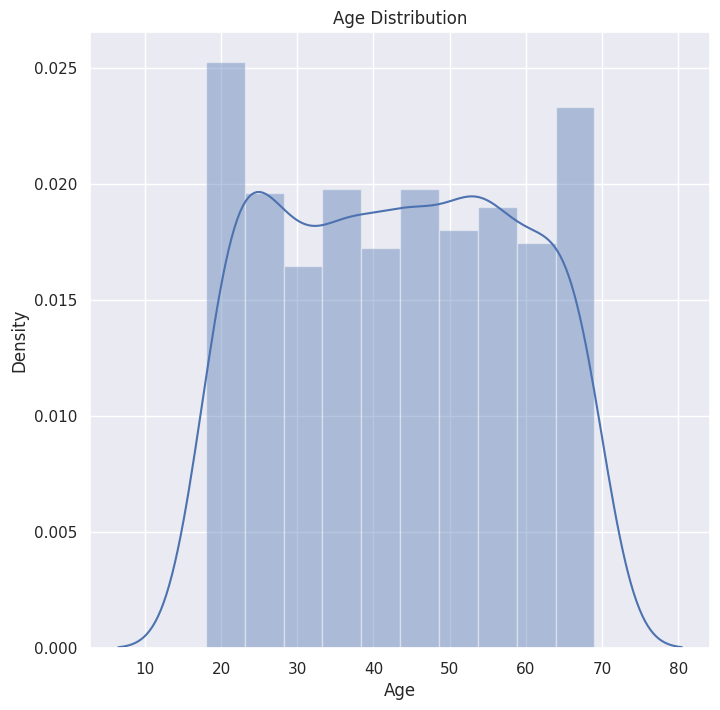

In [129]:
#visualization
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(data['Age'])
plt.title("Age Distribution")
plt.show()

<ipython-input-130-8875c715afd3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income'])


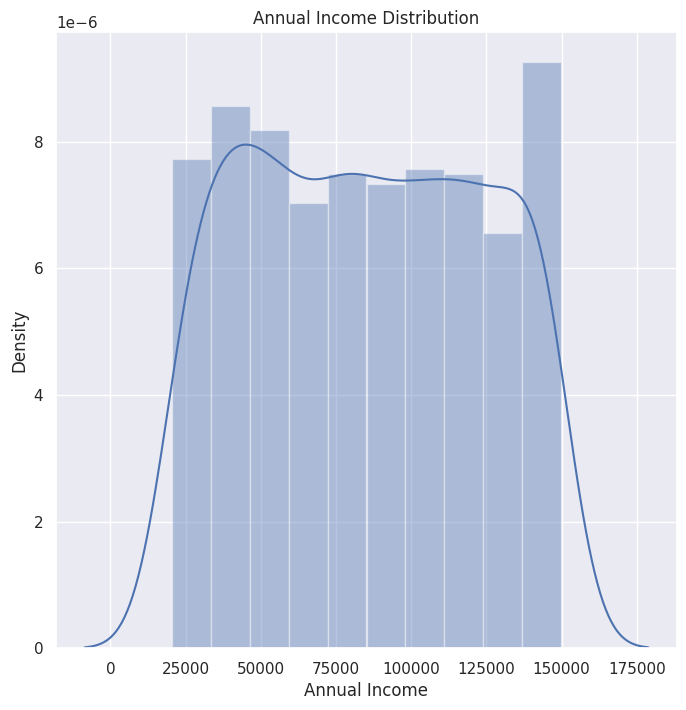

In [130]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(data['Annual Income'])
plt.title("Annual Income Distribution")
plt.show()

<ipython-input-131-4a46a11285c8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score'])


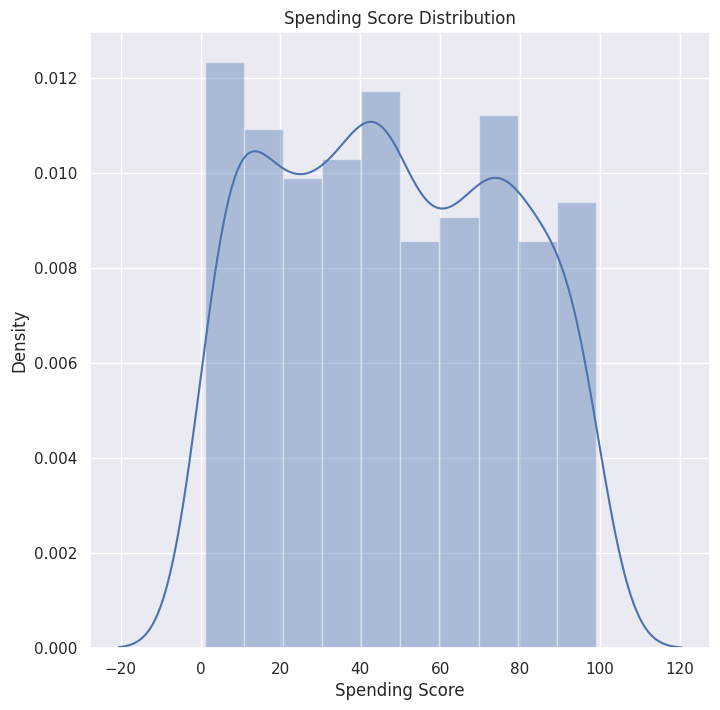

In [131]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(data['Spending Score'])
plt.title("Spending Score Distribution")
plt.show()

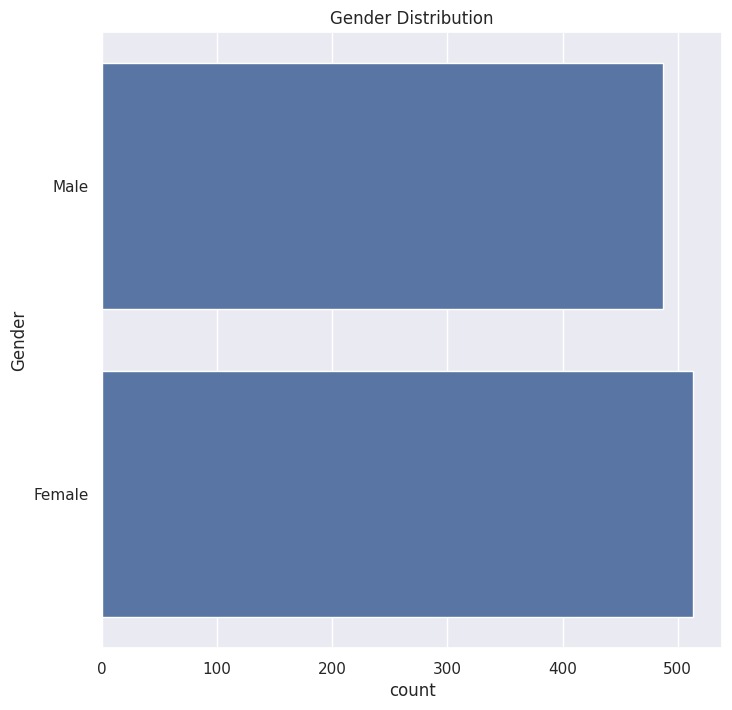

In [132]:
sns.set()
plt.figure(figsize=(8,8))
sns.countplot(data['Gender'])
plt.title("Gender Distribution")
plt.show()

In [133]:
data.replace({"Gender":{"Female":0,"Male":1}},inplace=True)

In [134]:
data.head()


,Customer ID,Age,Gender,Annual Income,Spending Score
0,1,62,1,56564,86
1,2,65,1,25393,73
2,3,18,1,143520,39
3,4,21,1,64711,43
4,5,21,1,147014,98


In [135]:
#saperating the features from our dataset
x=data.iloc[:,[3,4]].values
#printing the x values
print(x)

[[ 56564     86]
 [ 25393     73]
 [143520     39]
 ...
 [131103     61]
 [ 59332      1]
 [133068     40]]


In [136]:
#checking how many clusters we need for thios dataset
#that is done by WCSS

WCSS=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

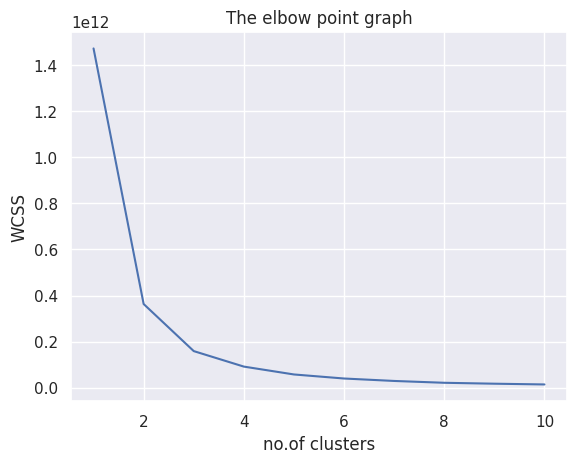

In [137]:
#plot an elbow graph to check the no.of clusters
sns.set()
plt.plot(range(1,11),WCSS)
plt.title("The elbow point graph")
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show()

-->from above graph we come to know that no.of clusters we need for our dataset is 4.,because there is no trend further 4

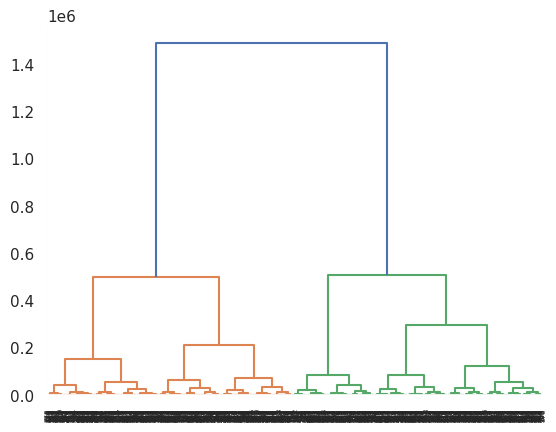

In [138]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))

In [139]:
#training the KMeans model
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)

In [140]:
#return a label for each datapoint based on their clusters
y=kmeans.fit_predict(x)
print(y)

[0 2 1 0 1 0 3 2 3 2 0 1 3 2 2 2 2 2 3 3 3 1 1 0 2 1 2 2 2 0 0 3 0 1 2 2 1
 1 0 3 3 2 2 0 1 2 1 3 2 1 3 2 1 3 1 1 3 0 0 1 2 1 3 2 1 2 2 0 3 2 0 0 2 0
 1 3 1 1 1 0 1 1 3 1 1 0 0 1 0 0 0 3 0 0 3 3 2 0 3 2 2 1 1 2 1 3 1 1 2 3 2
 0 2 1 1 2 2 0 2 2 1 2 3 1 3 0 1 3 1 0 2 1 0 3 1 2 2 2 1 3 2 1 3 2 0 3 1 2
 0 3 3 3 3 3 1 0 0 1 3 3 3 3 3 0 1 1 1 1 1 1 3 0 2 3 2 0 2 2 3 3 1 0 1 1 2
 2 3 2 2 1 2 3 0 1 0 3 1 3 0 3 1 3 1 3 2 3 3 0 0 0 2 3 1 0 3 3 2 0 2 0 2 1
 0 0 0 3 1 2 0 2 0 2 1 1 1 0 3 3 3 1 0 1 0 2 1 3 0 3 2 0 2 1 1 1 2 0 0 2 2
 1 3 3 3 1 0 3 3 3 0 1 2 2 0 1 2 1 2 0 3 1 0 0 3 1 0 2 1 0 3 3 0 2 0 3 1 3
 2 3 3 2 3 2 3 0 1 0 1 3 3 2 3 3 0 1 3 1 2 3 2 3 1 2 0 0 3 3 1 1 2 3 1 1 2
 2 2 1 3 1 3 1 0 2 1 3 2 1 3 3 0 3 1 1 0 3 0 1 1 3 3 2 3 3 1 2 3 1 1 1 3 2
 1 0 1 1 1 2 1 0 2 3 1 2 0 0 3 3 1 0 0 0 2 3 3 3 3 3 0 3 0 3 0 1 0 3 2 2 0
 3 1 3 0 3 0 1 0 0 3 3 1 2 1 1 3 3 3 3 1 1 0 2 0 1 1 3 0 3 2 2 3 1 3 3 1 3
 1 2 3 0 0 3 1 3 2 2 1 0 1 2 0 3 2 3 2 0 2 1 2 0 2 2 2 1 2 0 2 0 2 1 1 2 2
 2 0 3 0 1 1 3 0 0 1 1 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


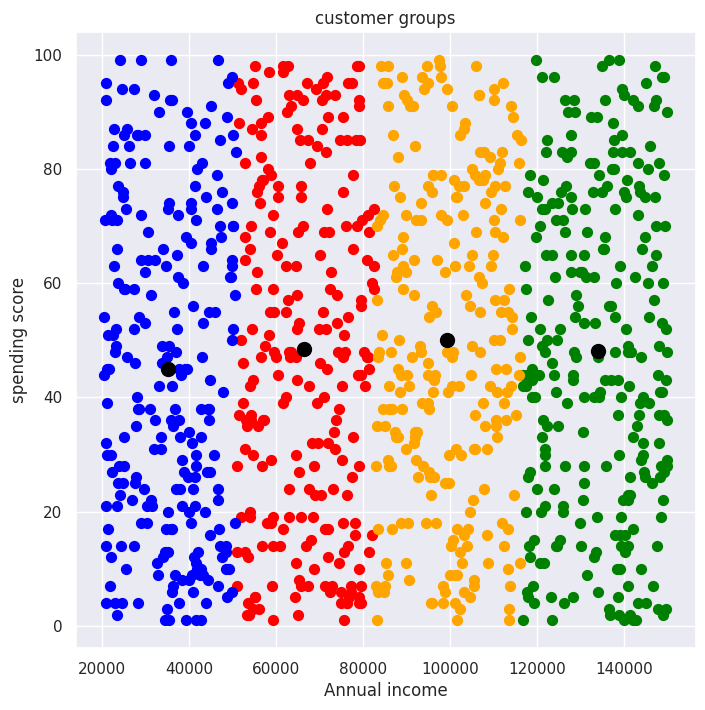

In [141]:
#visualizing all the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='red',label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='green',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='orange',label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='purple',label='cluster 5')

#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroid')
plt.title('customer groups')
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.show()

In [142]:
#Evaluation
from sklearn.metrics import silhouette_score
print(silhouette_score(x,y))

0.5700009070356007


# **Strengths of K-Means Clustering:**


1. **Simplicity and Ease of Implementation:**K-Means is straightforward to implement and understand. It involves simple iterative steps that can be executed quickly.
2. **Scalability:** K-Means performs well on large datasets. The time complexity is linear with respect to the number of data points.
3.   **Efficiency:** The algorithm is computationally efficient, especially when using optimizations like k-means++ for centroid initialization.
Effectiveness for Well-Separated Clusters: K-Means works well when the clusters are well-separated and roughly spherical.

# **Limitations of K-Means Clustering:**



1.   **Assumption of Spherical Clusters:** K-Means assumes that clusters are spherical and evenly sized, which may not be the case in real-world data.
2.   **Sensitivity to Initialization:** The final result depends on the initial placement of centroids. Poor initialization can lead to suboptimal clustering.


3.   **Difficulty Handling Different Cluster Sizes and Densities:** K-Means may struggle with clusters of different sizes and densities, leading to poor cluster assignments.
4.   **Requirement for Pre-Specified Number of Clusters:** The number of clusters (k) must be specified in advance, which may not always be known.
5.  **Impact of Outliers:** K-Means is sensitive to outliers, which can
distort the cluster centroids and affect the overall clustering quality.







# **How the Company Can Use These Insights to Improve Customer Engagement and Increase Sales**



1.   **Personalized Marketing:** Use the insights from clustering to create personalized marketing campaigns tailored to the needs and preferences of each customer segment.
2.   **Product Development:** Develop and introduce products that cater specifically to the characteristics and preferences of each cluster, enhancing product-market fit.
3.   **Customer Retention:**Implement targeted retention strategies such as loyalty programs and exclusive offers for high-value customers, and engagement campaigns for low-spending segments.
4.   **Resource Allocation:** Allocate marketing resources efficiently by focusing on high-potential segments for upselling and targeted promotions.
5.  **Customer Feedback:** Collect feedback from different customer segments to understand their needs better and refine marketing strategies accordingly.
6.  **Enhanced Customer Experience:** Improve the overall customer experience by offering personalized recommendations, customized communication, and responsive customer service.
By leveraging these insights, the company can enhance customer engagement, drive targeted sales strategies, and ultimately increase revenue.




